Merge sort OK
Quick sort OK


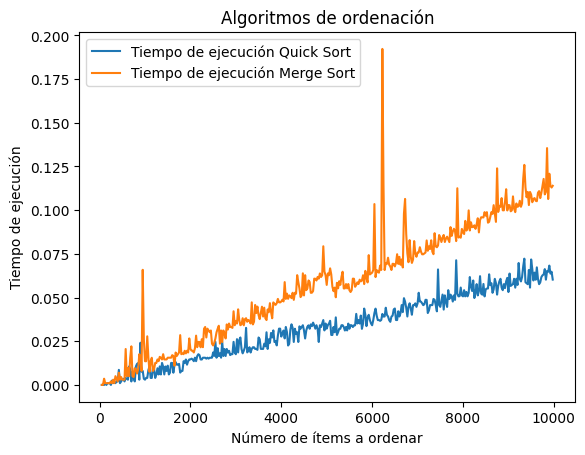

In [39]:
import random
import time
import matplotlib.pyplot as plt


def particion (lista, principio, final):
    pivote = lista[final]
    i = principio - 1
    for j in range(principio, final):
         if lista[j] <= pivote:
            i+=1

            (lista[i], lista[j]) = (lista[j], lista[i])

    (lista[i+1], lista[final]) = (lista[final], lista[i + 1])

    return i + 1

def QuickSort(lista, principio, final):
    if principio < final:
        pivote = particion (lista, principio, final)

        QuickSort(lista, principio, pivote - 1)
        QuickSort(lista, pivote + 1, final)

def MergeSort(lista):
    if len(lista) < 2:
        return lista

    else:
        puntoMedio = len(lista) // 2
        derecha = MergeSort(lista[:puntoMedio])
        izquierda = MergeSort(lista[puntoMedio:])
        return unirPartes(derecha, izquierda)

def unirPartes(izquierda, derecha):
    i = 0
    j = 0
    partesOrdenadas = []

    while (i < len(izquierda) and j < len(derecha)):
        if (izquierda[i] < derecha[j]):
            partesOrdenadas.append(izquierda[i])
            i+=1
        else:
            partesOrdenadas.append(derecha[j])
            j+=1

    partesOrdenadas += izquierda[i:]
    partesOrdenadas += derecha[j:]

    return partesOrdenadas

def checkOrdenacionCorrecta():
    lista = random.sample(range(1, 5000), 1000)
    listaAux = lista
    listaEstandar = lista
    estandar = sorted(listaEstandar)
    ordenadaPorMergeSort = MergeSort(lista)
    QuickSort(listaAux, 0, len(listaAux)-1)

    # Comprobación ordenaciones
    if estandar == ordenadaPorMergeSort:
        print('Merge sort OK')
    else:
        print('Merge sort ERROR')

    if estandar == listaAux:
        print('Quick sort OK')
    else:
        print('Quick sort ERROR')


def quickSortVsMergeSort():
    numeroItems = range(50, 10000, 25)
    mergeSortResultList=[]
    quickSortResultList=[]

    for i in range(0, len(numeroItems)):
        lista = (random.sample(range(1, 10000), numeroItems[i]))
        inicioMergeSort = time.time()
        MergeSort(lista)
        finMergeSort = time.time()
        mergeSortResultList.append(finMergeSort-inicioMergeSort)

        inicioQuickSort = time.time()
        QuickSort(lista, 0, numeroItems[i]-1)
        finQuickSort = time.time()
        quickSortResultList.append(finQuickSort-inicioQuickSort)
       

    plt.plot(numeroItems, quickSortResultList, label='Tiempo de ejecución Quick Sort')
    plt.plot(numeroItems, mergeSortResultList, label= 'Tiempo de ejecución Merge Sort')
    plt.title('Algoritmos de ordenación')
    plt.xlabel('Número de ítems a ordenar')
    plt.ylabel('Tiempo de ejecución')
    plt.legend()
    plt.show()

checkOrdenacionCorrecta()
quickSortVsMergeSort()
